In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load Data
file_path = "rate_my_prof.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   professor_name            20000 non-null  object 
 1   school_name               20000 non-null  object 
 2   department_name           20000 non-null  object 
 3   local_name                20000 non-null  object 
 4   state_name                20000 non-null  object 
 5   year_since_first_review   20000 non-null  float64
 6   star_rating               20000 non-null  float64
 7   diff_index                20000 non-null  float64
 8   num_student               20000 non-null  float64
 9   post_date                 19995 non-null  object 
 10  name_onlines              20000 non-null  object 
 11  name_not_onlines          19995 non-null  object 
 12  student_star              20000 non-null  float64
 13  student_difficult         20000 non-null  float64
 14  help_u

None

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,diff_index,num_student,post_date,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,26.0,06/27/2017,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,26.0,04/16/2017,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,26.0,12/07/2016,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,26.0,12/08/2014,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,26.0,05/02/2014,...,0,0,0,0,0,1,0,0,0,0


In [22]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

post_date           5
name_not_onlines    5
dtype: int64

In [24]:
#Data Cleaning
columns_to_drop = ["take_again","tag_professor","attence", "for_credits", "would_take_agains", "grades"]
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['take_again', 'tag_professor', 'attence', 'for_credits', 'would_take_agains', 'grades'] not found in axis"

In [26]:
#Fill missing values
df["comments"].fillna("No Comment", inplace=True)
df["word_comment"].fillna(df["word_comment"].mean(), inplace=True)
df["student_star"].fillna(df["student_star"].mean(), inplace=True)
df["student_difficult"].fillna(df["student_difficult"].mean(), inplace=True)

C:\Users\Sumit Sah\AppData\Local\Temp\ipykernel_15468\141803994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["comments"].fillna("No Comment", inplace=True)
C:\Users\Sumit Sah\AppData\Local\Temp\ipykernel_15468\141803994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [28]:
df.isnull().sum()

professor_name              0
school_name                 0
department_name             0
local_name                  0
state_name                  0
year_since_first_review     0
star_rating                 0
diff_index                  0
num_student                 0
post_date                   5
name_onlines                0
name_not_onlines            5
student_star                0
student_difficult           0
help_useful                 0
help_not_useful             0
comments                    0
word_comment                0
gender                      0
race                        0
asian                       0
hispanic                    0
nh_black                    0
nh_white                    0
gives_good_feedback         0
caring                      0
respected                   0
participation_matters       0
clear_grading_criteria      0
skip_class                  0
amazing_lectures            0
inspirational               0
tough_grader                0
hilarious 

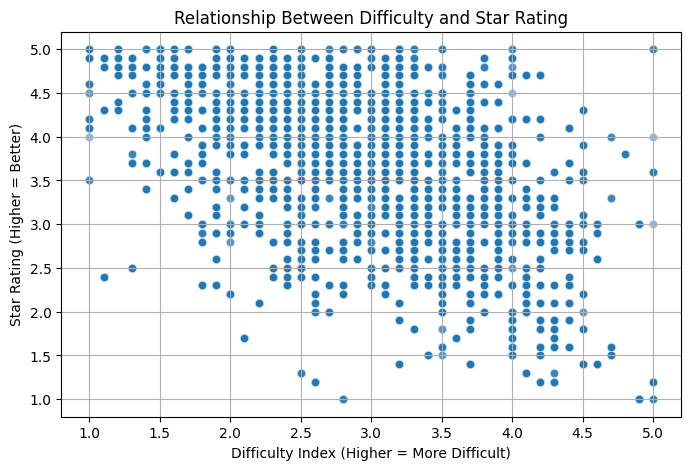

In [30]:
#Grading Bias Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["diff_index"], y=df["star_rating"], alpha=0.5)
plt.title("Relationship Between Difficulty and Star Rating")
plt.xlabel("Difficulty Index (Higher = More Difficult)")
plt.ylabel("Star Rating (Higher = Better)")
plt.grid(True)
plt.show()

In [32]:
correlation = df[["diff_index", "star_rating"]].corr().iloc[0, 1]
print(f"Correlation between difficulty and rating: {correlation:.2f}")

Correlation between difficulty and rating: -0.54


In [34]:
mean1 = df[df["tough_grader"] == 0]["star_rating"].mean()
mean2 = df[df["tough_grader"] == 1]["star_rating"].mean()
mean1, mean2

(np.float64(3.687724188075618), np.float64(3.612989445011917))

C:\Users\Sumit Sah\AppData\Local\Temp\ipykernel_15468\3527474391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tough_grader_avg.index, y=tough_grader_avg.values, palette=["blue", "red"])


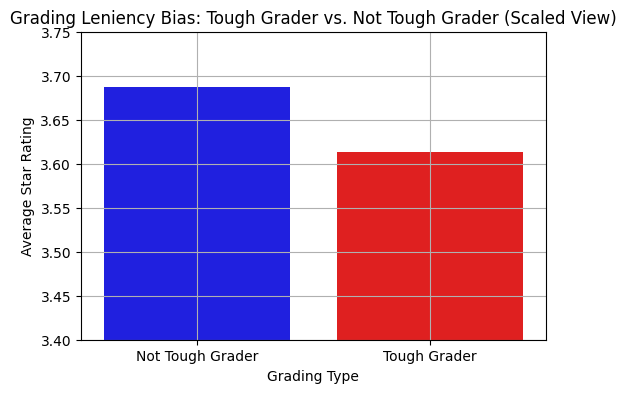

In [36]:
# Step 2: Calculate average ratings for tough graders vs. non-tough graders
tough_grader_avg = df.groupby("tough_grader")["star_rating"].mean()
tough_grader_avg.index = ["Not Tough Grader", "Tough Grader"]

# Step 3: Create a scaled bar plot to highlight the difference
plt.figure(figsize=(6, 4))
sns.barplot(x=tough_grader_avg.index, y=tough_grader_avg.values, palette=["blue", "red"])

# Scale the y-axis to exaggerate the difference
plt.ylim(3.4, 3.75)

plt.xlabel("Grading Type")
plt.ylabel("Average Star Rating")
plt.title("Grading Leniency Bias: Tough Grader vs. Not Tough Grader (Scaled View)")
plt.grid(True)
plt.show()

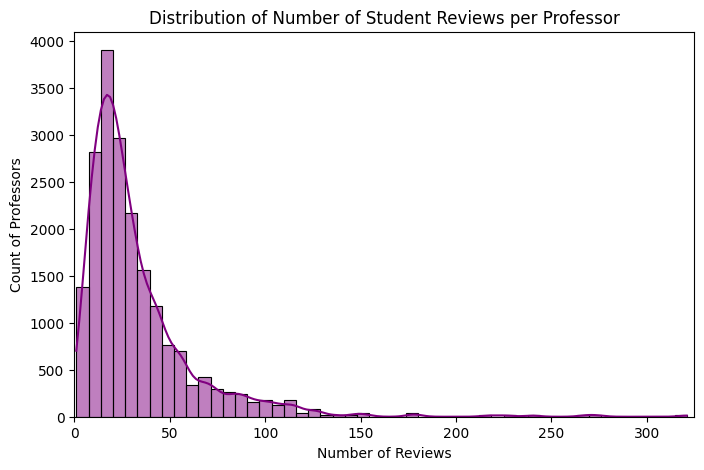

count    20000.000000
mean        33.266850
std         31.321627
min          1.000000
25%         15.000000
50%         24.000000
75%         41.000000
max        321.000000
Name: num_student, dtype: float64

In [38]:
# Analyze the distribution of the number of student reviews per professor
plt.figure(figsize=(8, 5))
sns.histplot(df["num_student"], bins=50, kde=True, color="purple")
plt.title("Distribution of Number of Student Reviews per Professor")
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Professors")
plt.xlim(0, 325)  # Limit for better visualization
plt.show()

# Compute statistics for sampling bias
num_reviews_stats = df["num_student"].describe()
num_reviews_stats
df["num_student"].describe()

C:\Users\Sumit Sah\AppData\Local\Temp\ipykernel_15468\2762356560.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  extremity_bias = df.groupby("review_category")["star_rating"].std()
C:\Users\Sumit Sah\AppData\Local\Temp\ipykernel_15468\2762356560.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_category"], y=df["star_rating"], showfliers=True, palette="coolwarm")


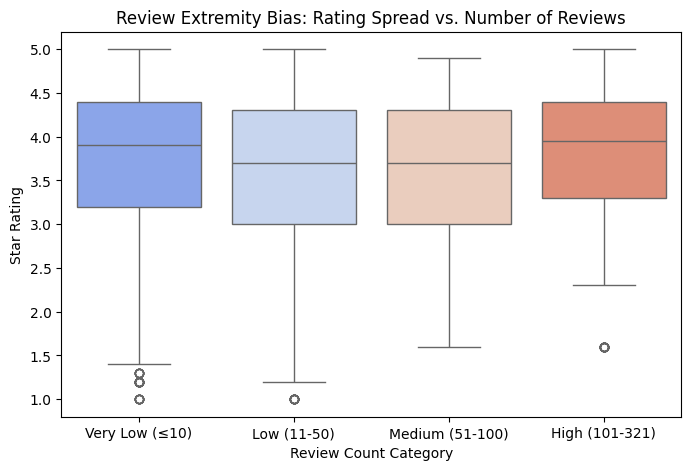

In [40]:
# Calculate rating standard deviation for different review groups
df["review_category"] = pd.cut(df["num_student"], bins=[0, 10, 50, 100, 321], 
                               labels=["Very Low (≤10)", "Low (11-50)", "Medium (51-100)", "High (101-321)"])

# Compute rating standard deviation for each group
extremity_bias = df.groupby("review_category")["star_rating"].std()

# Boxplot: Rating spread across different review groups
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["review_category"], y=df["star_rating"], showfliers=True, palette="coolwarm")
plt.xlabel("Review Count Category")
plt.ylabel("Star Rating")
plt.title("Review Extremity Bias: Rating Spread vs. Number of Reviews")
plt.show()

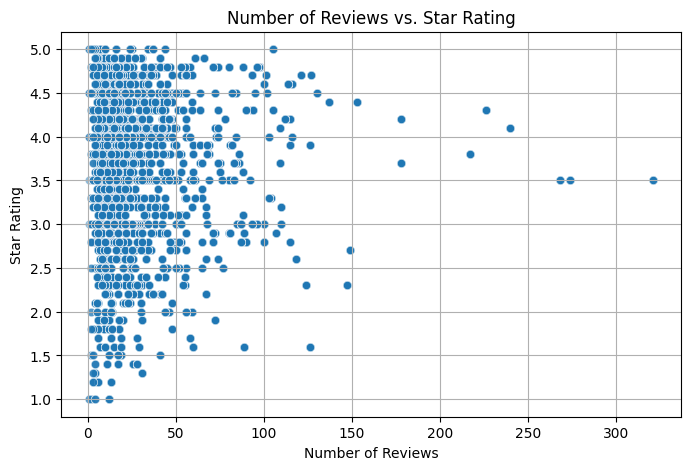

In [42]:
# Correlation between review count and ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["num_student"], y=df["star_rating"], alpha=0.5)
plt.title("Number of Reviews vs. Star Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Star Rating")
plt.grid(True)
plt.show()

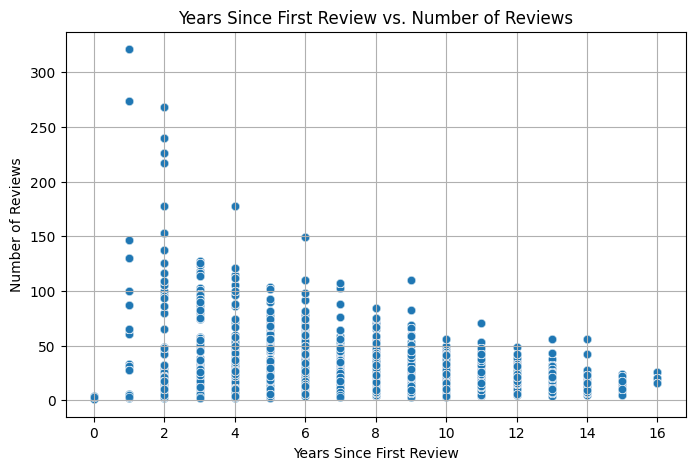

In [44]:
# Experience Bias Analysis: Comparing New vs. Senior Professors
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year_since_first_review"], y=df["num_student"], alpha=0.5)
plt.title("Years Since First Review vs. Number of Reviews")
plt.xlabel("Years Since First Review")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[["year_since_first_review", "num_student"]].corr().iloc[0, 1]
print(f"Correlation between difficulty and rating: {correlation:.2f}")

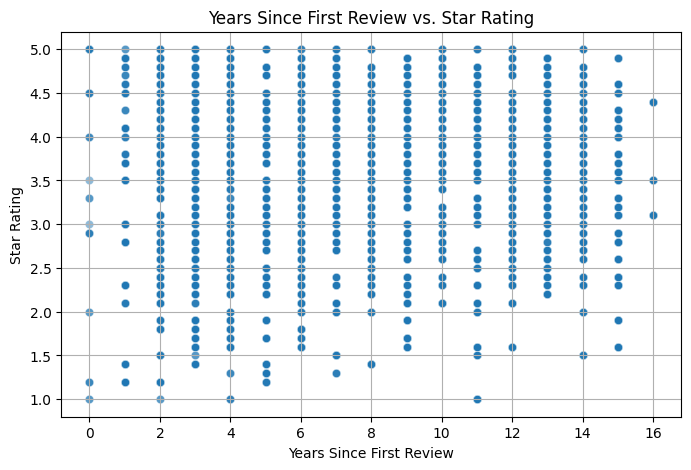

In [46]:
# Experience Bias Analysis: Comparing New vs. Senior Professors
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year_since_first_review"], y=df["star_rating"], alpha=0.5)
plt.title("Years Since First Review vs. Star Rating")
plt.xlabel("Years Since First Review")
plt.ylabel("Star Rating")
plt.grid(True)
plt.show()

In [48]:
correlation = df[["year_since_first_review", "star_rating"]].corr().iloc[0, 1]
print(f"Correlation between difficulty and rating: {correlation:.2f}")

Correlation between difficulty and rating: 0.07
